### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variables are the test conditions (Congurent and Incongurent).<br>The dependent variable is the time the participants take to name the ink colors.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis $H_{0}$ is that there is no significant difference between the period of time the participant take to name the ink color, so the reaction time (RT) for congruent and incongruent is almost the same.<br>
The alternative hypothesis $H_{1}$ is that the participant needs to take more time to name ink color for incongruent words so, the average reaction time is significantly longer.<br>
Null hypothesis and alternative hypothesis are:<br>

$H_{0}$:μi−μc=0

$H_{1}$:μi−μc≠0

Where μc represents the reaction time under congruent conditions and μi represents the reaction time under incongruent conditions in my formula.<br>

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline
#read data
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#calculating the sample mean of reaction time for Congruent test condition.
congruent_mean = df['Congruent'].mean()
congruent_mean

14.051124999999999

In [4]:
#calculating the sample mean of reaction time for Incongruent test condition.
incongruent_mean = df['Incongruent'].mean()
incongruent_mean

22.015916666666666

In [5]:
#calculating the sample variance of reaction time for Congruent test condition.
sample_std_con = statistics.stdev(df['Congruent'])
sample_std_con

3.5593579576451955

In [6]:
#calculating the sample variance of reaction time for Incongruent test condition.
sample_std_incon = statistics.stdev(df['Incongruent'])
sample_std_incon

4.7970571224691385

In [7]:
#calculating the sample variance of reaction time for Congruent test conditions.
statistics.variance(df['Congruent'])

12.669029070652176

In [8]:
#calculating the sample variance of reaction time for Incongruent test conditions.
statistics.variance(df['Incongruent'])

23.011757036231888

In [9]:
#calculating the difference of avareges to get the observed difference between the two test cases.
obs_diff_mean = incongruent_mean - congruent_mean
obs_diff_mean

7.9647916666666667

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

The below visualization shows the ditribution of the reaction times for congruent and incongruent condition.<br>
According to the result, the reaction time can be longer under incongruent word conditions.

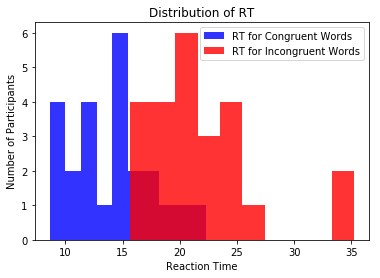

In [10]:
plt.hist(df['Congruent'], alpha=0.8, label='RT for Congruent Words', facecolor='blue')
plt.hist(df['Incongruent'], alpha=0.8, label='RT for Incongruent Words', facecolor='red')
plt.xlabel('Reaction Time')
plt.ylabel('Number of Participants')
plt.title('Distribution of RT')
plt.legend(loc='upper right')
plt.show()

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Doing bootstrapped the differences of sample means for congruent and incongruent to get normally disributed values for further analysis.

In [12]:
diffs = []

for i in range(10000):
    sample = df.sample(df.shape[0], replace = True)
    con_sample = sample['Congruent'].mean()
    incon_sample = sample['Incongruent'].mean()
    diff = incon_sample - con_sample
    diffs.append(diff)

Creating a histogram about the differences just to take a quick look at the distribution and the mean.<br>
Where the mean value is about 8

Text(0.5,1,'Distribution of Reaction Time')

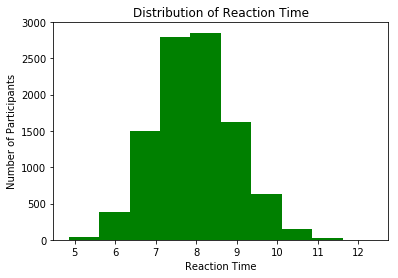

In [13]:
diffs_arr = np.asarray(diffs)
plt.hist(diffs_arr, facecolor='green')
plt.xlabel('Reaction Time')
plt.ylabel('Number of Participants')
plt.title('Distribution of Reaction Time')

Simulating the distribution under the null hypothesis, with the size of the boostrapped differences and with the calculated standard deviation.

In [14]:
null_vals = np.random.normal(0, diffs_arr.std(), diffs_arr.size)

Plotting the null distibution and marked the mean of the observed differences with a black line.

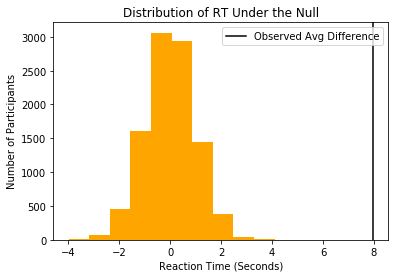

In [15]:
plt.hist(null_vals, facecolor='orange')
plt.axvline(x = incongruent_mean-congruent_mean, color = 'black', label = 'Observed Avg Difference')
plt.xlabel('Reaction Time (Seconds)')
plt.ylabel('Number of Participants')
plt.title('Distribution of RT Under the Null')
plt.legend()
plt.show()

Based on the visualisation, the observed differences are far from the differences simulated under the null hypothesis which indicates a big difference between the observed values and the values of the null hypothesis.

In [16]:
( diffs_arr < null_vals ).mean()

0.0

**Conclusion**<br>
As a conclusion, we can state that based on our visualization and calculation, we reject the null hypothesis.<br>
The line chart that created of the differences in the question 4 earlier indicating that there are no values in the statistics which could match with the values generated under the null hypothesis.<br>
According to our observations, we can conclude that the participants reaction time under incorgruent conditions is longer.<br>
This conclusion matches up with my expectation and also highlights some interesting parts of psychology and brain functions.